In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap


PROJETO DE MINERAÇÃO DE DADOS COM ETL! Acidentes 2024 (Agrupados por pessoa - Todas as causas e tipos de acidentes)

In [ ]:
# Substitua 'seu_arquivo.csv' pelo nome do arquivo que você fez upload
df = pd.read_csv('acidentes2024.csv', sep=';', encoding='latin1')
pd.set_option('display.max_columns', None)  # Mostrar todas as colunas
df.head()


,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,causa_acidente,ordem_tipo_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,ano_fabricacao_veiculo,tipo_envolvido,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,571772.0,1268971.0,2024-01-01,segunda-feira,00:05:00,RJ,101.0,"272,5",TANGUA,Sim,Reação tardia ou ineficiente do condutor,1.0,Colisão com objeto,Com Vítimas Fatais,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Sim,1018215.0,Motocicleta,HONDA/CG 160 FAN,2023.0,Condutor,Óbito,26.0,Masculino,0.0,0.0,0.0,1.0,-22.729360,-42.701125,SPRF-RJ,DEL02-RJ,UOP03-DEL02-RJ
1,571774.0,1268985.0,2024-01-01,segunda-feira,00:05:00,GO,153.0,"424,6",ANAPOLIS,Não,Animais na Pista,1.0,Colisão com objeto,Sem Vítimas,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Não,1018226.0,Automóvel,VW/GOL 1.6 POWER,2009.0,Condutor,Ileso,34.0,Feminino,1.0,0.0,0.0,0.0,-16.229185,-49.009797,SPRF-GO,DEL02-GO,UOP01-DEL02-GO
2,571774.0,1268985.0,2024-01-01,segunda-feira,00:05:00,GO,153.0,"424,6",ANAPOLIS,Sim,Velocidade Incompatível,1.0,Colisão com objeto,Sem Vítimas,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Não,1018226.0,Automóvel,VW/GOL 1.6 POWER,2009.0,Condutor,Ileso,34.0,Feminino,1.0,0.0,0.0,0.0,-16.229185,-49.009797,SPRF-GO,DEL02-GO,UOP01-DEL02-GO
3,571777.0,1269020.0,2024-01-01,segunda-feira,01:45:00,ES,101.0,"264,1",SERRA,Sim,Reação tardia ou ineficiente do condutor,1.0,Colisão com objeto,Sem Vítimas,Plena Noite,Decrescente,Nublado,Múltipla,Interseção de Vias;Reta,Sim,1018251.0,Caminhonete,VW/SAVEIRO 1.6,2009.0,Condutor,Ileso,55.0,Masculino,1.0,0.0,0.0,0.0,-20.172928,-40.267364,SPRF-ES,DEL02-ES,UOP01-DEL02-ES
4,571778.0,1269028.0,2024-01-01,segunda-feira,00:45:00,SC,101.0,110,PENHA,Não,Reação tardia ou ineficiente do condutor,1.0,Saída de leito carroçável,Com Vítimas Feridas,Plena Noite,Crescente,Chuva,Dupla,Curva,Não,1018261.0,Camioneta,I/SSANGYONG ACTYON A23 4,2011.0,Condutor,Ileso,53.0,Masculino,1.0,0.0,0.0,0.0,-26.834770,-48.706151,SPRF-SC,DEL03-SC,UOP02-DEL03-SC


In [ ]:
df.columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62520 entries, 0 to 62519
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      62520 non-null  int64  
 1   pesid                   57019 non-null  float64
 2   data_inversa            62520 non-null  object 
 3   dia_semana              62519 non-null  object 
 4   horario                 62519 non-null  object 
 5   uf                      62519 non-null  object 
 6   br                      62358 non-null  float64
 7   km                      62358 non-null  object 
 8   municipio               62519 non-null  object 
 9   causa_principal         62519 non-null  object 
 10  causa_acidente          62519 non-null  object 
 11  ordem_tipo_acidente     62519 non-null  float64
 12  tipo_acidente           62519 non-null  object 
 13  classificacao_acidente  62516 non-null  object 
 14  fase_dia                62519 non-null

In [ ]:
df.isnull().sum()


,0
id,0
pesid,5501
data_inversa,0
dia_semana,1
horario,1
uf,1
br,162
km,162
municipio,1
causa_principal,1


In [ ]:
# Excluir colunas com muitos dados ausentes
df.drop(columns=['pesid', 'tipo_envolvido', 'estado_fisico'], inplace=True)

# Preencher valores ausentes de idade com a mediana
df['idade'].fillna(df['idade'].median(), inplace=True)

# Preencher valores ausentes de sexo com 'Desconhecido'
df['sexo'].fillna('Desconhecido', inplace=True)

# Remover linhas onde 'municipio' ou 'causa_principal' são nulos
df.dropna(subset=['municipio', 'causa_principal'], inplace=True)


<ipython-input-7-b7ce1b8c6ef9>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['idade'].fillna(df['idade'].median(), inplace=True)
<ipython-input-7-b7ce1b8c6ef9>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [ ]:
# Convertendo para datetime
df['data_inversa'] = pd.to_datetime(df['data_inversa'], errors='coerce')

# Convertendo km para numérico
df['km'] = pd.to_numeric(df['km'], errors='coerce')

# Convertendo coluna 'ano_fabricacao_veiculo' para inteiro
df['ano_fabricacao_veiculo'] = df['ano_fabricacao_veiculo'].astype('Int64', errors='ignore')


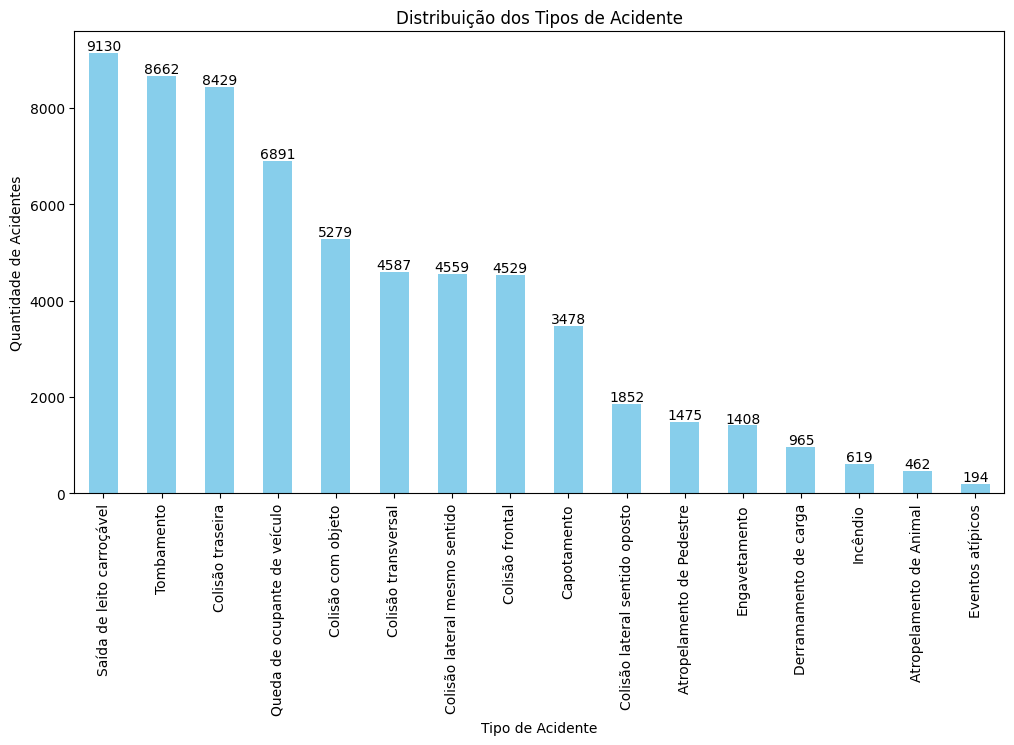

In [ ]:
import matplotlib.pyplot as plt

# Criando o gráfico de barras
ax = df['tipo_acidente'].value_counts().plot(kind='bar', figsize=(12,6), color='skyblue')

# Adicionando os números dentro das barras verticais
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posiciona no centro da barra
                ha='center', va='center',  # Alinha o texto ao centro
                fontsize=10, color='black',  # Tamanho e cor da fonte
                xytext=(0, 5), textcoords='offset points')  # Desloca o texto um pouco para cima da barra

# Títulos e rótulos do gráfico
plt.title('Distribuição dos Tipos de Acidente')
plt.ylabel('Quantidade de Acidentes')
plt.xlabel('Tipo de Acidente')
plt.xticks(rotation=90)  # Ajuste para a rotação dos rótulos no eixo X

# Exibe o gráfico
plt.show()


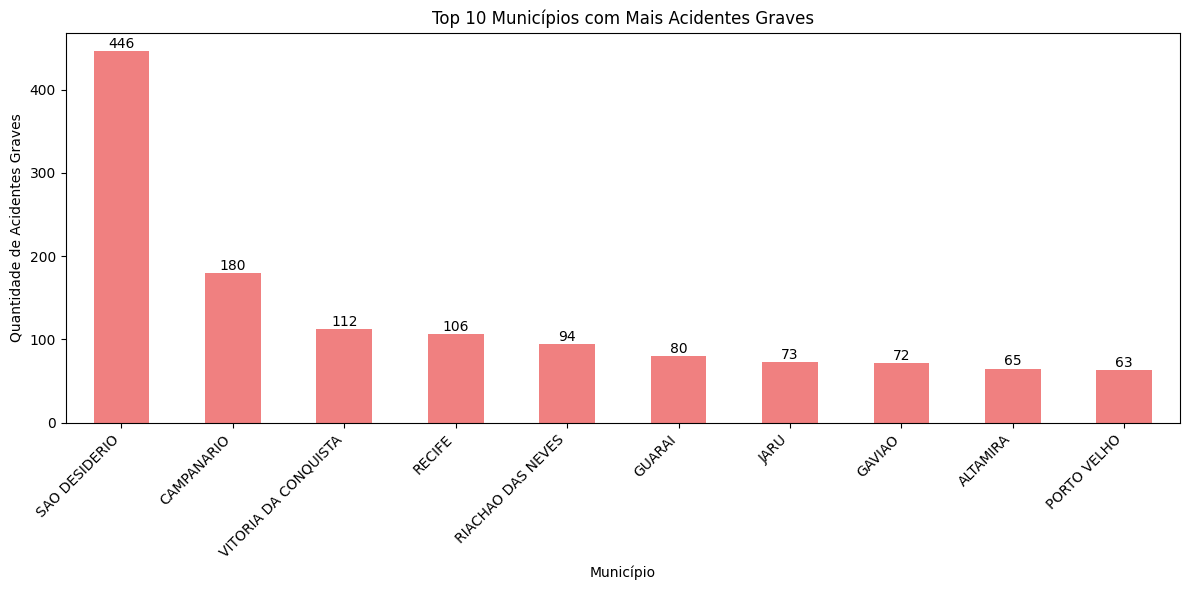

In [ ]:
import matplotlib.pyplot as plt

# Filtrando os acidentes graves (assumindo que 'feridos_graves' é a coluna que indica acidentes graves)
acidentes_graves = df[df['feridos_graves'] > 0]  # Filtra os acidentes com pelo menos um ferido grave

# Contando o número de acidentes graves por município
acidentes_graves_por_municipio = acidentes_graves['municipio'].value_counts()

# Selecionando apenas os 10 municípios com mais acidentes graves
top_10_municipios = acidentes_graves_por_municipio.head(10)

# Criando o gráfico
plt.figure(figsize=(12,6))
ax = top_10_municipios.plot(kind='bar', color='lightcoral')

# Adicionando título e rótulos
plt.title('Top 10 Municípios com Mais Acidentes Graves')
plt.ylabel('Quantidade de Acidentes Graves')
plt.xlabel('Município')

# Ajustando o posicionamento dos rótulos no eixo X para melhor visualização
plt.xticks(rotation=45, ha='right')

# Adicionando os números de acidentes em cima das barras
for i, value in enumerate(top_10_municipios):
    ax.text(i, value + 0.2, str(value), ha='center', va='bottom', fontsize=10)

# Exibe o gráfico
plt.tight_layout()  # Ajusta o layout para garantir que tudo seja visível
plt.show()




<ipython-input-16-01aea322766d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=acidentes_dia.index, y=acidentes_dia.values, palette='OrRd')


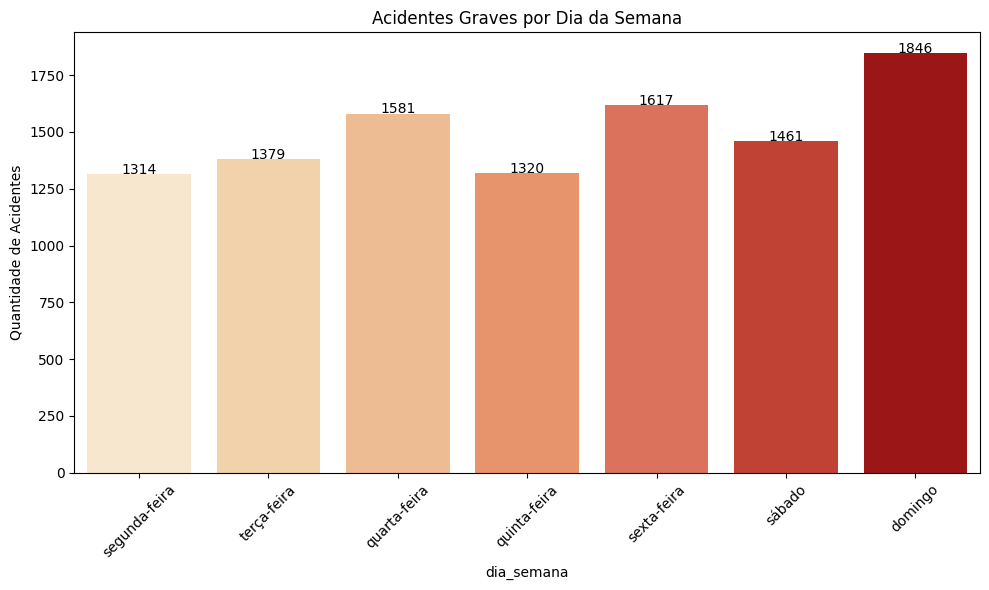

In [ ]:
import seaborn as sns

# Filtro para acidentes com feridos graves ou mortos
acidentes_graves = df[(df['feridos_graves'] > 0) | (df['mortos'] > 0)]

# Agrupar por dia da semana
acidentes_dia = acidentes_graves['dia_semana'].value_counts().reindex([
    'segunda-feira', 'terça-feira', 'quarta-feira', 'quinta-feira', 'sexta-feira', 'sábado', 'domingo'
])

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=acidentes_dia.index, y=acidentes_dia.values, palette='OrRd')
plt.title('Acidentes Graves por Dia da Semana')
plt.ylabel('Quantidade de Acidentes')
plt.xticks(rotation=45)

# Adiciona o número nas barras
for i, v in enumerate(acidentes_dia.values):
    plt.text(i, v + 1, str(v), ha='center')

plt.tight_layout()
plt.show()


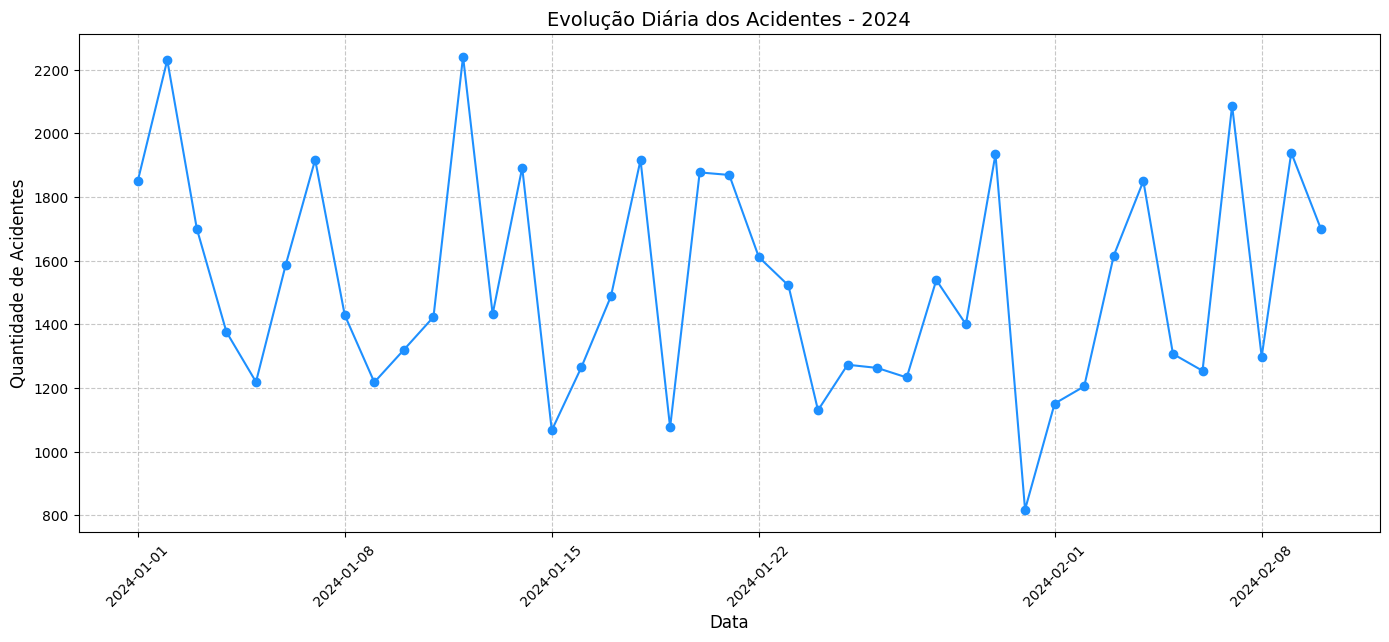

In [ ]:
# Converter para datetime, caso ainda não tenha feito
df['data_inversa'] = pd.to_datetime(df['data_inversa'])

# Agrupar por dia
acidentes_por_dia = df.groupby('data_inversa').size().reset_index(name='total')

# Plotar gráfico de linha diário
plt.figure(figsize=(14,6))
plt.plot(acidentes_por_dia['data_inversa'], acidentes_por_dia['total'], marker='o', color='dodgerblue')
plt.title('Evolução Diária dos Acidentes - 2024', fontsize=14)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Quantidade de Acidentes', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()
